## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## Pre-processing

In [2]:
csv_path = '../data/household_data_60min_singleindex.csv'

df = pd.read_csv(csv_path, parse_dates=["utc_timestamp", "cet_cest_timestamp"], index_col="utc_timestamp")
print('input data: ', df.shape)
#residential building in suburban area
columns_to_drop = [col for col in df.columns if not col.startswith('DE_KN_residential2')]

# Clear data
df = df.drop(columns= columns_to_drop)
df = df.dropna(how='all')

#Data shape and sample
print(f'Data shape after droping NaN {df.shape}')
df.head()

input data:  (38454, 70)
Data shape after droping NaN (24948, 5)


,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
utc_timestamp,,,,,
2015-04-01 08:00:00+00:00,0.045,NaN,NaN,NaN,NaN
2015-04-01 09:00:00+00:00,0.120,NaN,NaN,NaN,NaN
2015-04-01 10:00:00+00:00,0.209,NaN,NaN,NaN,NaN
2015-04-01 11:00:00+00:00,0.337,NaN,NaN,NaN,NaN
2015-04-01 12:00:00+00:00,0.374,NaN,NaN,NaN,NaN


## Processing data

In [3]:
df.describe()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
count,19823.000000,19134.000000,10251.000000,15798.000000,24733.000000
mean,408.500037,257.683142,70.825802,2017.480739,192.611891
std,267.120269,172.538958,40.784379,1276.756154,129.810820
min,0.045000,0.000000,0.000000,0.070000,0.000000
25%,130.167000,109.456000,34.940000,843.162250,76.808000
50%,447.998000,243.549500,72.539000,1988.988000,174.098000
75%,595.986500,401.277750,106.251500,3055.799250,312.911000
max,868.885000,596.351000,140.505000,4495.448000,428.020000


### NaN values

In [4]:
df.isna().sum()

DE_KN_residential2_circulation_pump     5125
DE_KN_residential2_dishwasher           5814
DE_KN_residential2_freezer             14697
DE_KN_residential2_grid_import          9150
DE_KN_residential2_washing_machine       215
dtype: int64

In [5]:
df = df.diff().fillna(0)
df.head()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
utc_timestamp,,,,,
2015-04-01 08:00:00+00:00,0.000,0.0,0.0,0.0,0.0
2015-04-01 09:00:00+00:00,0.075,0.0,0.0,0.0,0.0
2015-04-01 10:00:00+00:00,0.089,0.0,0.0,0.0,0.0
2015-04-01 11:00:00+00:00,0.128,0.0,0.0,0.0,0.0
2015-04-01 12:00:00+00:00,0.037,0.0,0.0,0.0,0.0


In [6]:
daily_usage_filtered = []
K = 5 #standard deviations

for column_name in df:
    mean = df[column_name].mean()
    std_dev = df[column_name].std()

    # Define a range for normal values
    lower_bound = mean - K * std_dev
    upper_bound = mean + K * std_dev

    # Filter out values outside the normal range
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [7]:
grid_import = df['DE_KN_residential2_grid_import']

df = df.drop(columns= 'DE_KN_residential2_grid_import')

In [8]:
df['sum'] = df.sum(axis=1, numeric_only=True)
df.head()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_washing_machine,sum
utc_timestamp,,,,,
2015-04-01 08:00:00+00:00,0.000,0.0,0.0,0.0,0.000
2015-04-01 09:00:00+00:00,0.075,0.0,0.0,0.0,0.075
2015-04-01 10:00:00+00:00,0.089,0.0,0.0,0.0,0.089
2015-04-01 11:00:00+00:00,0.128,0.0,0.0,0.0,0.128
2015-04-01 12:00:00+00:00,0.037,0.0,0.0,0.0,0.037


## Graphs

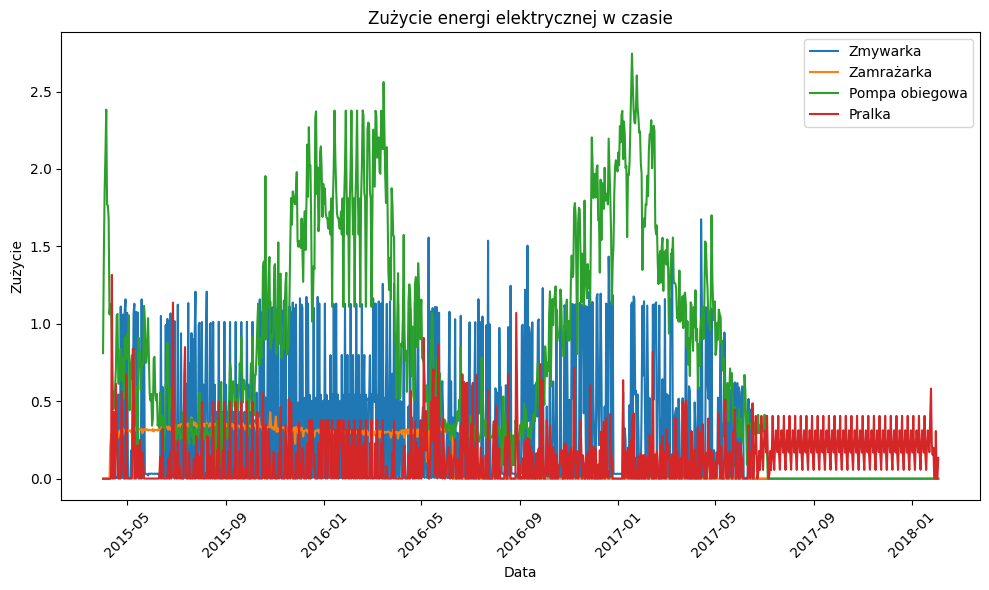

In [9]:
# Energy consumption plot
df_daily_sum = df.resample('D').sum()

plt.figure(figsize=(10, 6))

plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_dishwasher'], label='Zmywarka')
plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_freezer'], label='Zamrażarka')
plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_circulation_pump'], label='Pompa obiegowa')
plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_washing_machine'], label='Pralka')

plt.xlabel('Data')
plt.ylabel('Zużycie')
plt.title('Zużycie energi elektrycznej w czasie')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

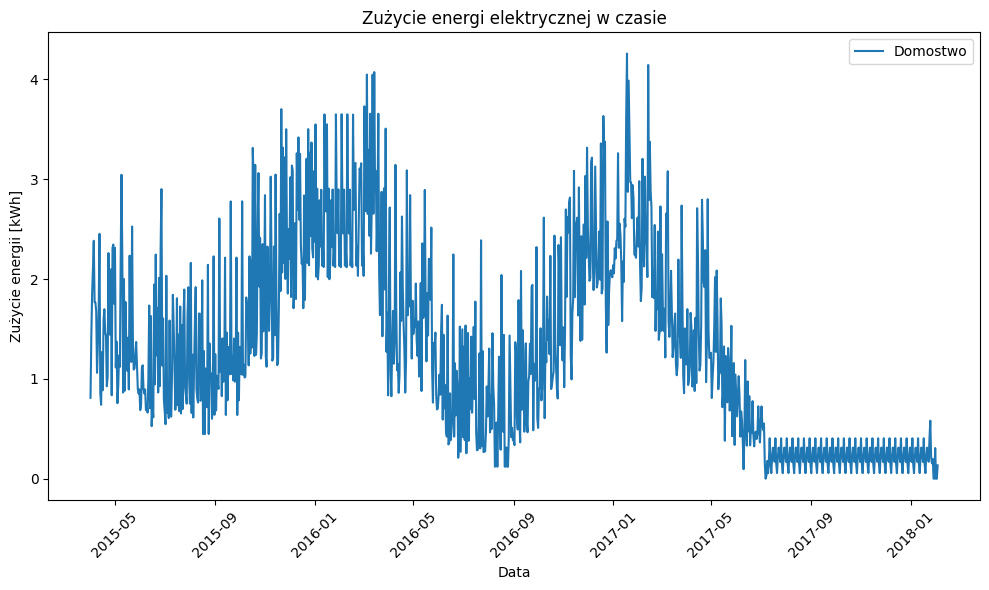

In [10]:
# Sum energy consumption plot
plt.figure(figsize=(10, 6))

plt.plot(df_daily_sum.index, df_daily_sum['sum'], label='Domostwo')

plt.xlabel('Data')
plt.ylabel('Zużycie energii [kWh]')
plt.title('Zużycie energi elektrycznej w czasie')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
correlation_matrix = df.corr()
correlation_matrix.head()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_washing_machine,sum
DE_KN_residential2_circulation_pump,1.000000,0.074220,0.135689,0.009547,0.526409
DE_KN_residential2_dishwasher,0.074220,1.000000,0.036957,-0.009653,0.807051
DE_KN_residential2_freezer,0.135689,0.036957,1.000000,-0.022853,0.157132
DE_KN_residential2_washing_machine,0.009547,-0.009653,-0.022853,1.000000,0.349611
sum,0.526409,0.807051,0.157132,0.349611,1.000000


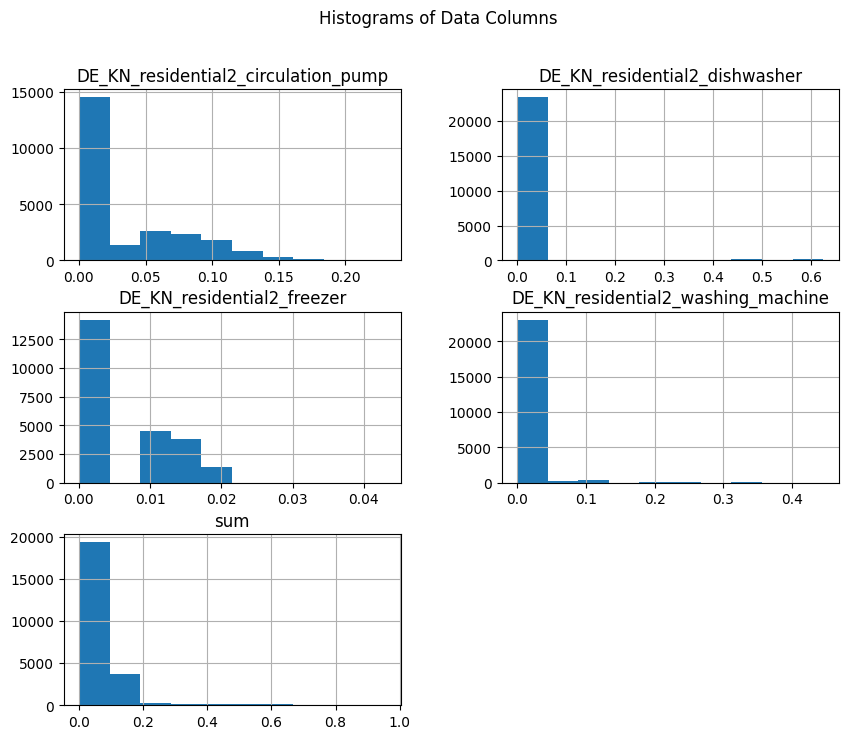

In [12]:
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Data Columns")
plt.show()

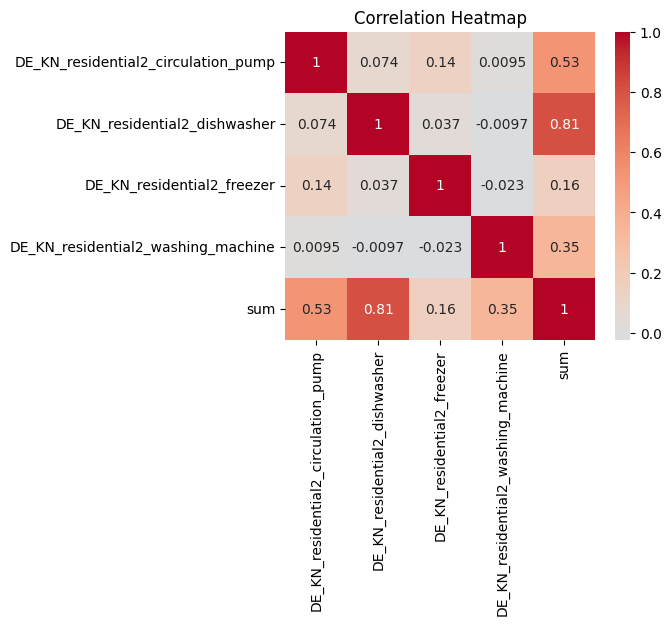

In [13]:
# Create heatmap correlation matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

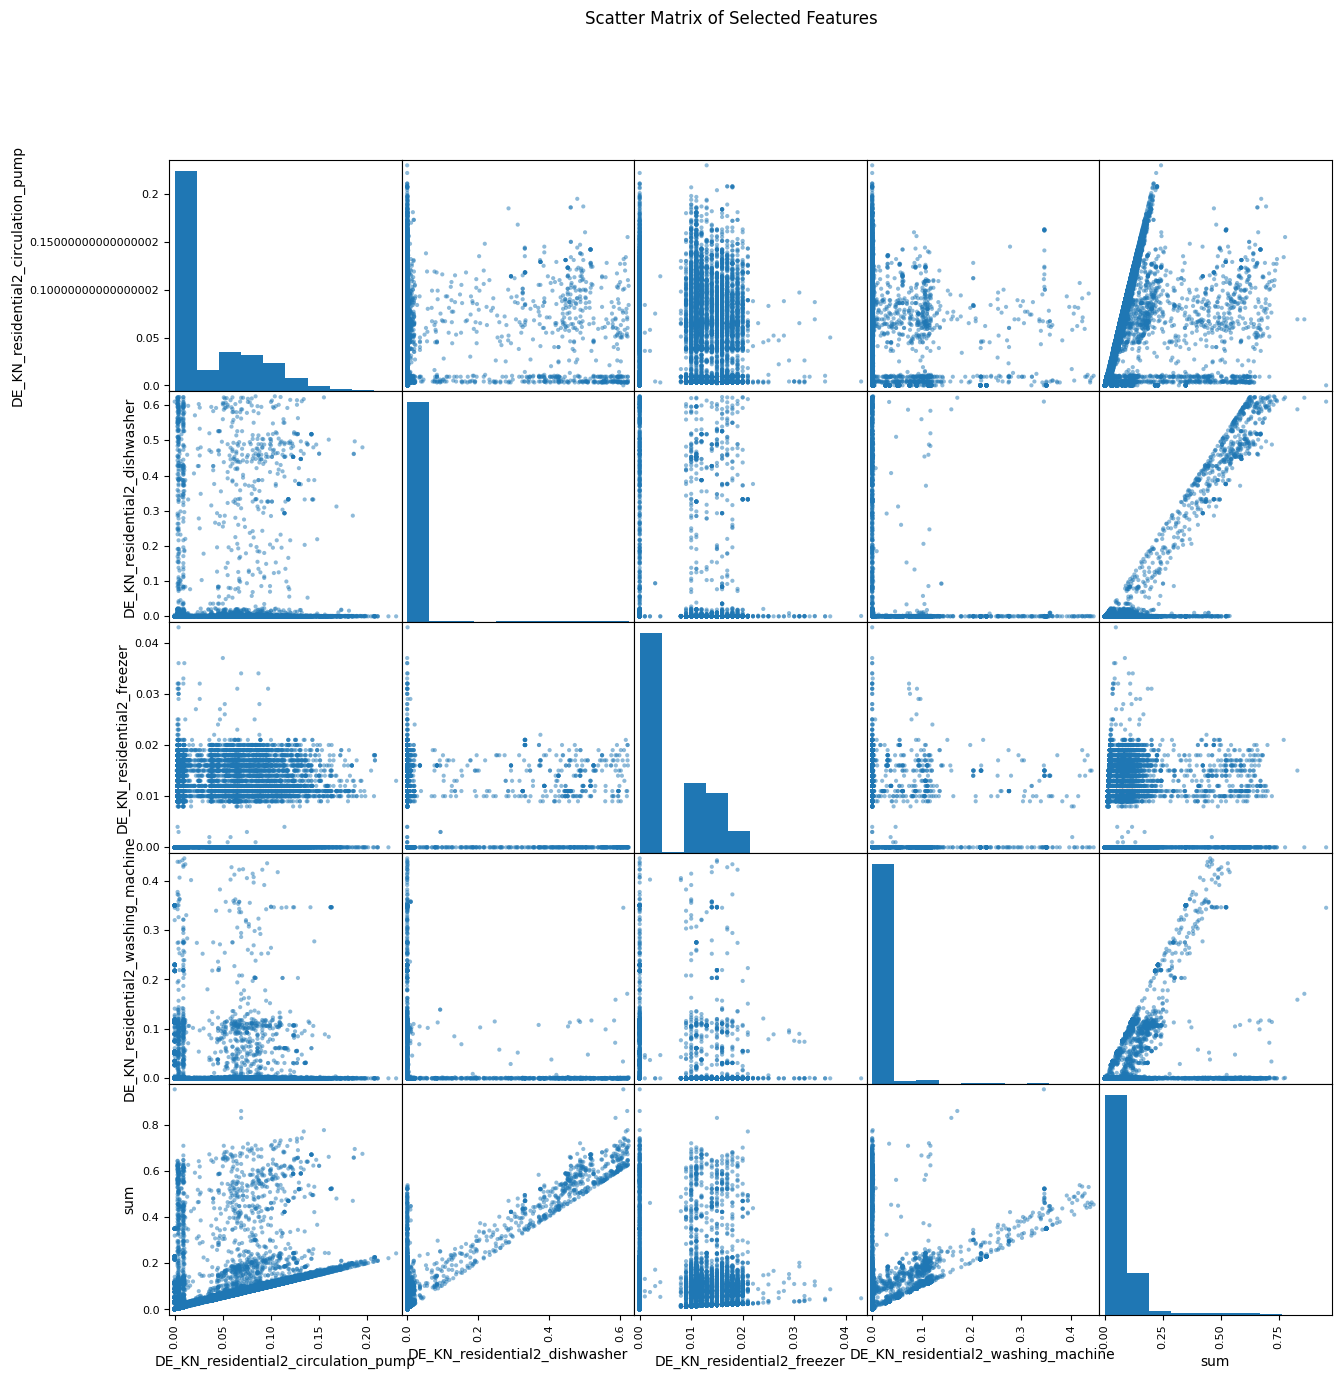

In [14]:
# Correlation matrix using scatter_matrix
scatter_matrix(df[['DE_KN_residential2_circulation_pump','DE_KN_residential2_dishwasher','DE_KN_residential2_freezer','DE_KN_residential2_washing_machine','sum']], figsize=(15, 15))
plt.suptitle("Scatter Matrix of Selected Features")
plt.show()

## Split data 

In [15]:
df = pd.DataFrame(df_daily_sum)

# Prepare features and target
features = (df.index.astype(np.int64) // 10**9).values.reshape(-1,1)

#features = grid_import.values.reshape(-1,1)
target = df['sum']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=11)


## LinearRegression model

In [16]:
# Create Linear Regression model
model_LR = LinearRegression()

# Train the model on the training data
model_LR.fit(X_train, y_train)

print(f'R^2: {model_LR.score(X_test,y_test)}')

# Make predictions on the testing data
y_pred = model_LR.predict(X_test)

# Evaluate model performance using Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred)

R^2: 0.2004860166788528


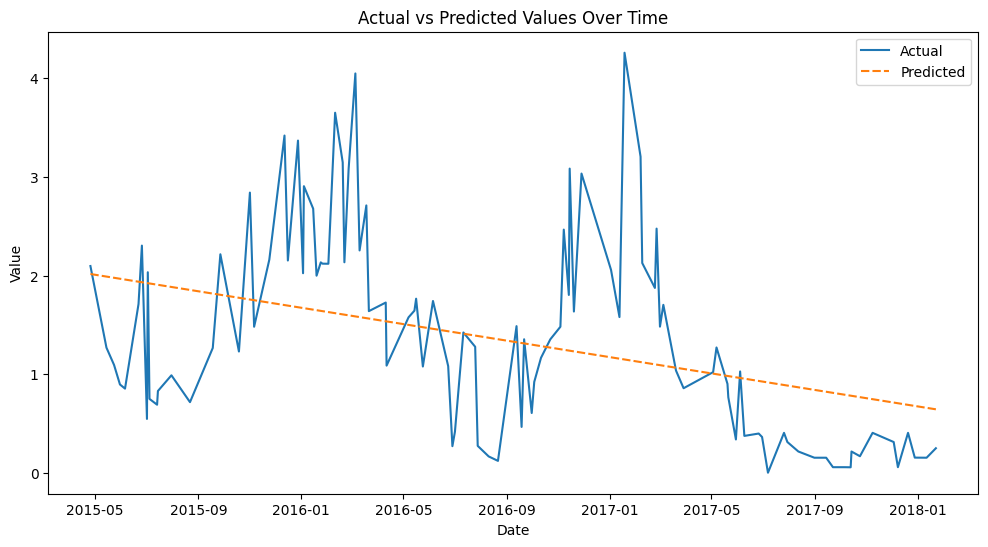

In [17]:
y_pred = model_LR.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values Over Time")
plt.legend()
plt.show()

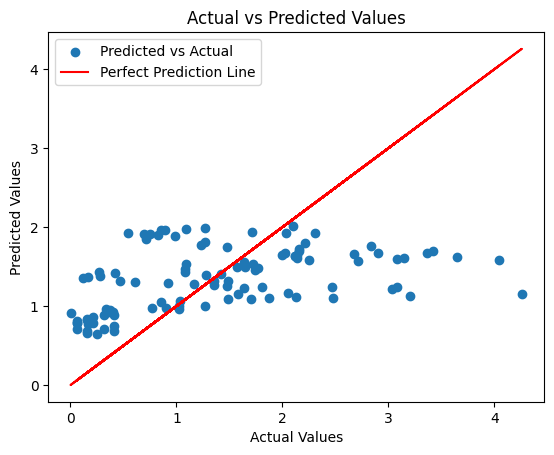

In [18]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='r', label='Perfect Prediction Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

## DecisionTreeRegressor Model

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model_tree = DecisionTreeRegressor(max_depth=50)  # You can adjust hyperparameters like max_depth
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50)

In [21]:
print(f'R^2: {model_tree.score(X_test,y_test)}')
y_pred = model_tree.predict(X_test)
mse_DTR = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_DTR)

R^2: 0.46982130278654577
Mean Squared Error: 0.5406569038461542


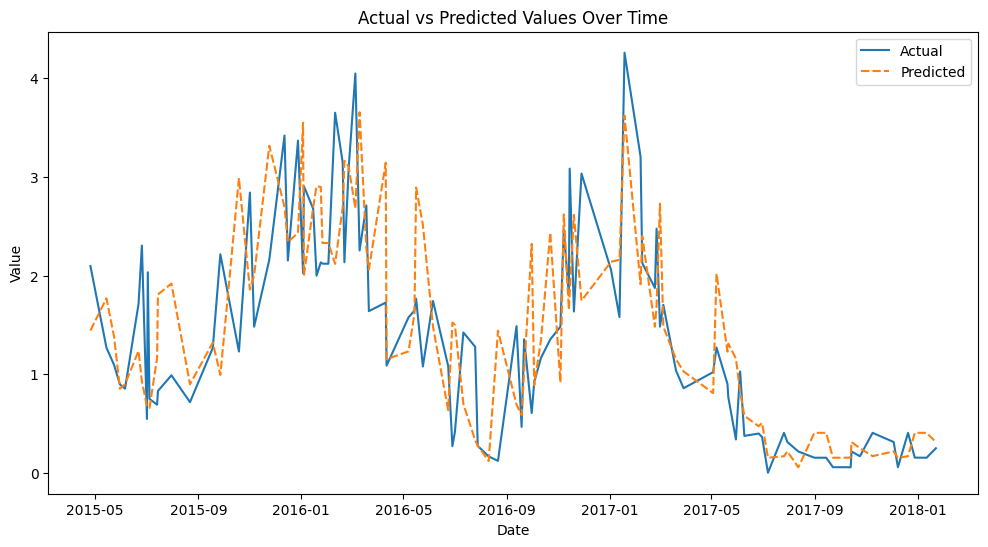

In [22]:
y_pred = model_tree.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values Over Time")
plt.legend()
plt.show()

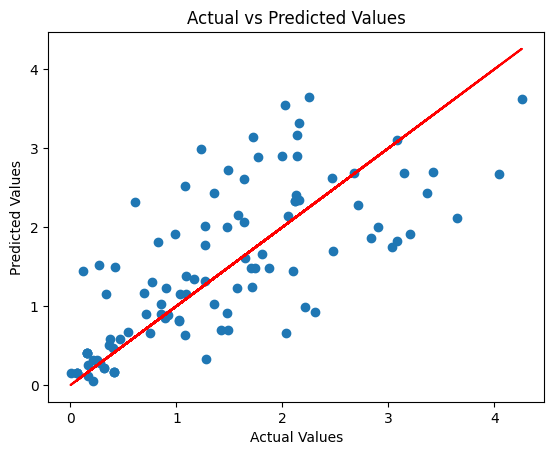

In [23]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='r', label='Perfect Prediction Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [24]:
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic

kernel_rbf = RBF(length_scale=1.0)
model_rbf = GaussianProcessRegressor(kernel=kernel_rbf, n_restarts_optimizer=10)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
print(f'R^2: {model_tree.score(X_test,y_test)}')

R^2: 0.46982130278654577


## RandomForestRegressor

In [25]:
model_rfr = RandomForestRegressor(n_estimators=500, random_state=50)

model_rfr.fit(X_train, y_train)
print(f'R^2: {model_rfr.score(X_test,y_test)}')

y_pred = model_rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R^2: 0.6122943645936151
Mean Squared Error: 0.3953680703208808


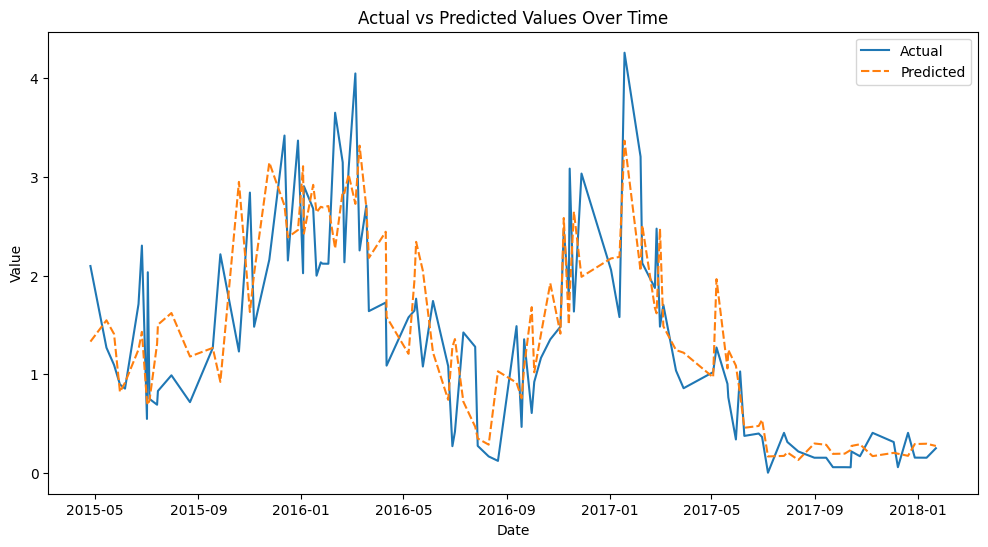

In [27]:
y_pred = model_rfr.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values Over Time")
plt.legend()
plt.show()

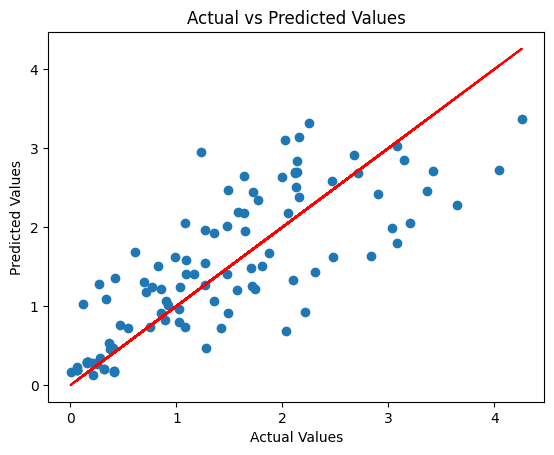

In [26]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='r', label='Perfect Prediction Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()